# Feature scaling

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import preprocessing

In [2]:
size = 1000

n_skew = np.random.beta(a=20, b=2, size=size)
p_skew = np.random.beta(a=3, b=30, size=size)
norm = np.random.normal(loc=500, scale=16, size=size)
outlier = np.random.normal(loc=500, scale=16, size=size-2)
outlier = np.concatenate((outlier, [700, 800]), axis=0)

X = pd.DataFrame(np.column_stack((p_skew, norm, n_skew, outlier)), columns=['p_skew', 'normal', 'n_skew', 'outlier'])

X.describe()

,p_skew,normal,n_skew,outlier
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.088810,498.942473,0.910304,501.633358
std,0.049091,16.037536,0.056885,19.660831
min,0.007263,440.689657,0.675553,451.482189
25%,0.051575,488.233680,0.877611,489.970480
50%,0.079649,499.644938,0.918517,501.080655
75%,0.117528,510.108827,0.954024,512.045380
max,0.320086,547.975498,0.998684,800.000000


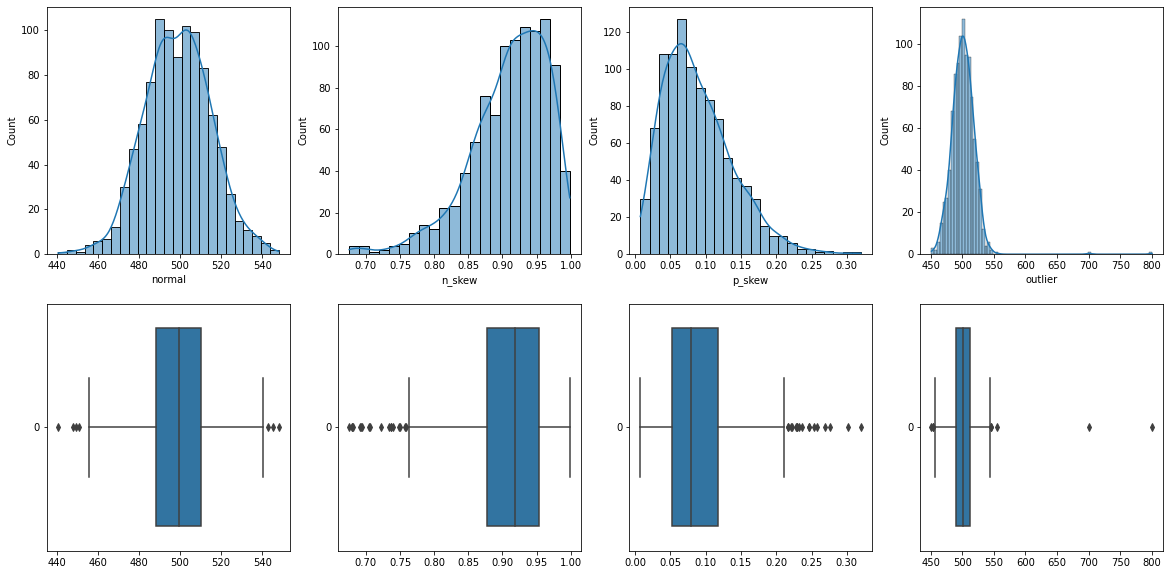

In [3]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

_ = sns.histplot(ax=axes[0,0], data=X['normal'], kde=True)
_ = sns.boxplot(ax=axes[1,0], data=X['normal'], orient='h')
_ = sns.histplot(ax=axes[0,1], data=X['n_skew'], kde=True)
_ = sns.boxplot(ax=axes[1,1], data=X['n_skew'], orient='h')
_ = sns.histplot(ax=axes[0,2], data=X['p_skew'], kde=True,)
_ = sns.boxplot(ax=axes[1,2], data=X['p_skew'], orient='h')
_ = sns.histplot(ax=axes[0,3], data=X['outlier'], kde=True,)
_ = sns.boxplot(ax=axes[1,3], data=X['outlier'], orient='h')

## Min / Max

In [4]:
scaler = preprocessing.MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.describe()

,p_skew,normal,n_skew,outlier
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.260680,0.542968,0.726488,0.143898
std,0.156929,0.149484,0.176044,0.056413
min,0.000000,0.000000,0.000000,0.000000
25%,0.141651,0.443153,0.625313,0.110434
50%,0.231394,0.549516,0.751905,0.142313
75%,0.352482,0.647049,0.861791,0.173774
max,1.000000,1.000000,1.000000,1.000000


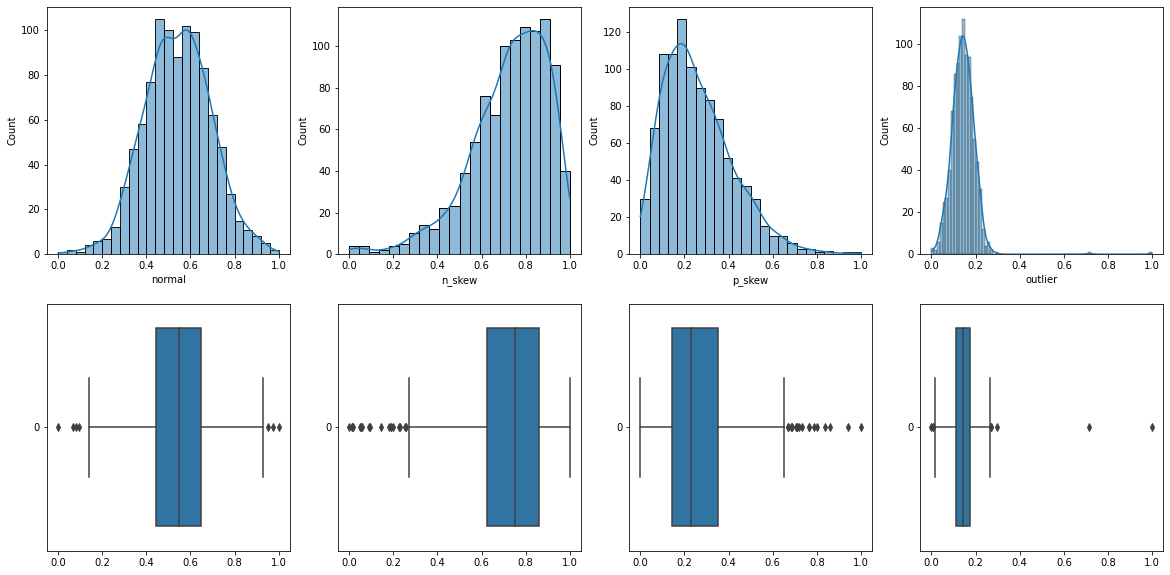

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

_ = sns.histplot(ax=axes[0,0], data=X_scaled['normal'], kde=True)
_ = sns.boxplot(ax=axes[1,0], data=X_scaled['normal'], orient='h')
_ = sns.histplot(ax=axes[0,1], data=X_scaled['n_skew'], kde=True)
_ = sns.boxplot(ax=axes[1,1], data=X_scaled['n_skew'], orient='h')
_ = sns.histplot(ax=axes[0,2], data=X_scaled['p_skew'], kde=True,)
_ = sns.boxplot(ax=axes[1,2], data=X_scaled['p_skew'], orient='h')
_ = sns.histplot(ax=axes[0,3], data=X_scaled['outlier'], kde=True,)
_ = sns.boxplot(ax=axes[1,3], data=X_scaled['outlier'], orient='h')

# MaxAbsScaler

In [6]:
scaler = preprocessing.MaxAbsScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.describe()

,p_skew,normal,n_skew,outlier
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.277456,0.910520,0.911503,0.627042
std,0.153368,0.029267,0.056960,0.024576
min,0.022691,0.804214,0.676443,0.564353
25%,0.161128,0.890977,0.878767,0.612463
50%,0.248835,0.911802,0.919727,0.626351
75%,0.367175,0.930897,0.955281,0.640057
max,1.000000,1.000000,1.000000,1.000000


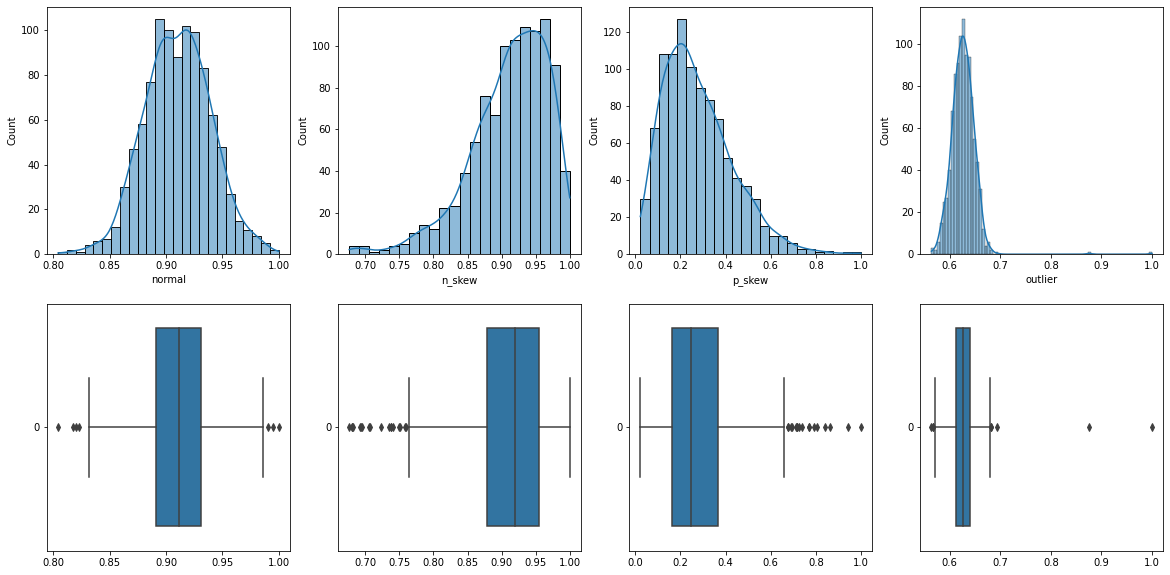

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

_ = sns.histplot(ax=axes[0,0], data=X_scaled['normal'], kde=True)
_ = sns.boxplot(ax=axes[1,0], data=X_scaled['normal'], orient='h')
_ = sns.histplot(ax=axes[0,1], data=X_scaled['n_skew'], kde=True)
_ = sns.boxplot(ax=axes[1,1], data=X_scaled['n_skew'], orient='h')
_ = sns.histplot(ax=axes[0,2], data=X_scaled['p_skew'], kde=True,)
_ = sns.boxplot(ax=axes[1,2], data=X_scaled['p_skew'], orient='h')
_ = sns.histplot(ax=axes[0,3], data=X_scaled['outlier'], kde=True,)
_ = sns.boxplot(ax=axes[1,3], data=X_scaled['outlier'], orient='h')

## RobustScaler

In [8]:
scaler = preprocessing.RobustScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.describe()

,p_skew,normal,n_skew,outlier
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.389052e-01,-3.211245e-02,-1.074826e-01,0.025038
std,7.443319e-01,7.331396e-01,7.444444e-01,0.890642
min,-1.097530e+00,-2.695081e+00,-3.179610e+00,-2.246826
25%,-4.256630e-01,-5.216540e-01,-5.353235e-01,-0.503294
50%,1.052218e-16,1.299308e-15,-7.264561e-16,0.000000
75%,5.743370e-01,4.783460e-01,4.646765e-01,0.496706
max,3.645591e+00,2.209382e+00,1.049128e+00,13.541142


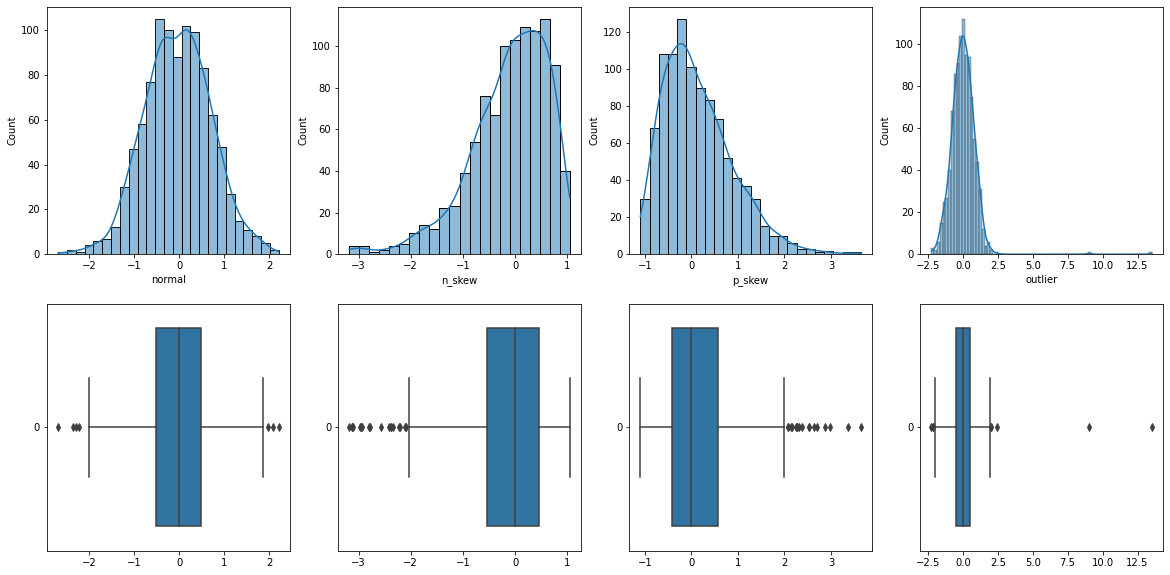

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

_ = sns.histplot(ax=axes[0,0], data=X_scaled['normal'], kde=True)
_ = sns.boxplot(ax=axes[1,0], data=X_scaled['normal'], orient='h')
_ = sns.histplot(ax=axes[0,1], data=X_scaled['n_skew'], kde=True)
_ = sns.boxplot(ax=axes[1,1], data=X_scaled['n_skew'], orient='h')
_ = sns.histplot(ax=axes[0,2], data=X_scaled['p_skew'], kde=True,)
_ = sns.boxplot(ax=axes[1,2], data=X_scaled['p_skew'], orient='h')
_ = sns.histplot(ax=axes[0,3], data=X_scaled['outlier'], kde=True,)
_ = sns.boxplot(ax=axes[1,3], data=X_scaled['outlier'], orient='h')

## PowerTransformer
Apply a power transform featurewise to make data more Gaussian-like.

In [10]:
scaler = preprocessing.PowerTransformer()

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.describe()

,p_skew,normal,n_skew,outlier
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.504663e-15,2.296563e-14,-3.652190e-15,-0.004667
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000489
min,-2.273214e+00,-3.583827e+00,-2.450396e+00,-3.803342
25%,-7.585256e-01,-6.704161e-01,-7.606752e-01,-0.629526
50%,-3.058199e-02,3.979842e-02,-2.602636e-02,0.062007
75%,7.425982e-01,6.946463e-01,7.946141e-01,0.669258
max,2.709157e+00,3.092332e+00,2.134885e+00,5.979226


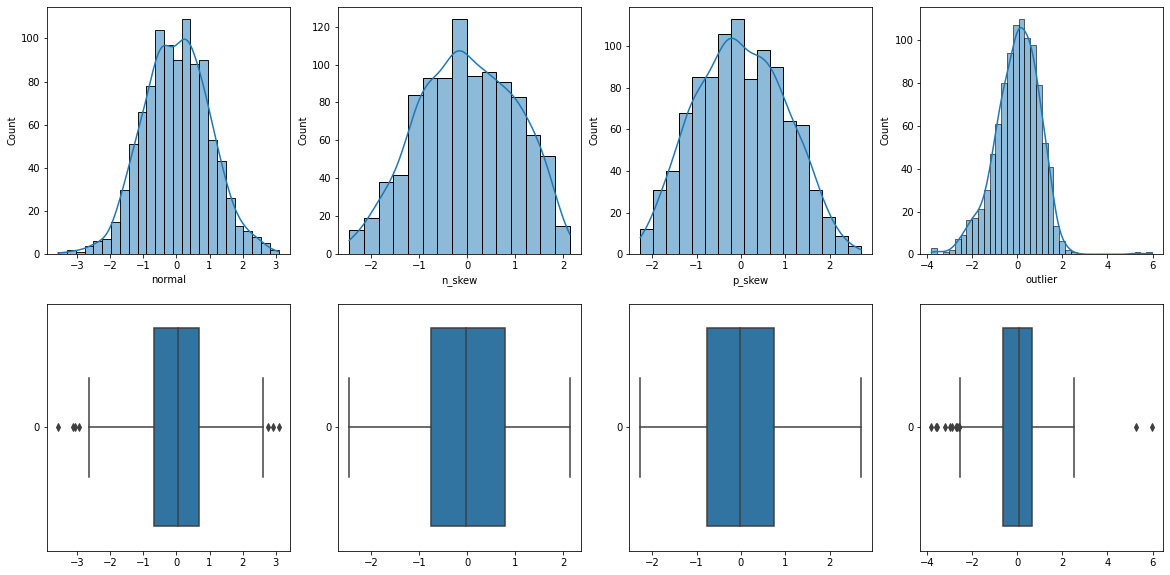

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

_ = sns.histplot(ax=axes[0,0], data=X_scaled['normal'], kde=True)
_ = sns.boxplot(ax=axes[1,0], data=X_scaled['normal'], orient='h')
_ = sns.histplot(ax=axes[0,1], data=X_scaled['n_skew'], kde=True)
_ = sns.boxplot(ax=axes[1,1], data=X_scaled['n_skew'], orient='h')
_ = sns.histplot(ax=axes[0,2], data=X_scaled['p_skew'], kde=True,)
_ = sns.boxplot(ax=axes[1,2], data=X_scaled['p_skew'], orient='h')
_ = sns.histplot(ax=axes[0,3], data=X_scaled['outlier'], kde=True,)
_ = sns.boxplot(ax=axes[1,3], data=X_scaled['outlier'], orient='h')

## Standardization
Standardize features by removing the mean and scaling to unit variance

In [12]:
scaler = preprocessing.StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.describe()

,p_skew,normal,n_skew,outlier
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.167155e-15,-2.653877e-15,-6.469492e-15,2.092593e-14
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.661966e+00,-3.634097e+00,-4.128804e+00,-2.552093e+00
25%,-7.588693e-01,-6.680672e-01,-5.749991e-01,-5.935005e-01
50%,-1.867106e-01,4.382320e-02,1.444519e-01,-2.812595e-02
75%,5.852897e-01,6.966120e-01,7.689567e-01,5.298470e-01
max,4.713544e+00,3.058921e+00,1.554434e+00,1.518328e+01


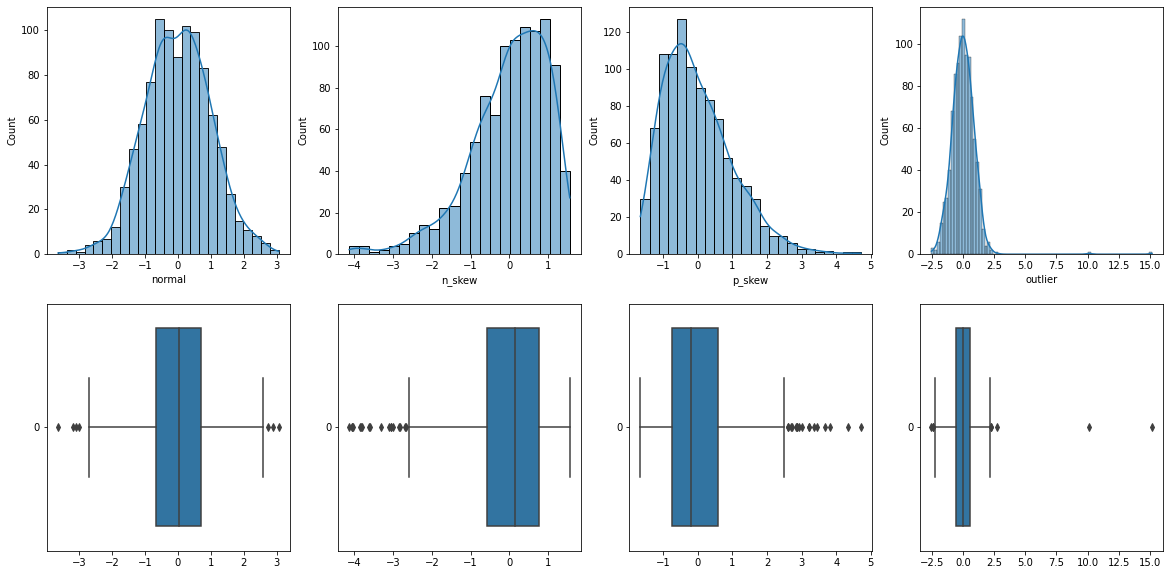

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

_ = sns.histplot(ax=axes[0,0], data=X_scaled['normal'], kde=True)
_ = sns.boxplot(ax=axes[1,0], data=X_scaled['normal'], orient='h')
_ = sns.histplot(ax=axes[0,1], data=X_scaled['n_skew'], kde=True)
_ = sns.boxplot(ax=axes[1,1], data=X_scaled['n_skew'], orient='h')
_ = sns.histplot(ax=axes[0,2], data=X_scaled['p_skew'], kde=True,)
_ = sns.boxplot(ax=axes[1,2], data=X_scaled['p_skew'], orient='h')
_ = sns.histplot(ax=axes[0,3], data=X_scaled['outlier'], kde=True,)
_ = sns.boxplot(ax=axes[1,3], data=X_scaled['outlier'], orient='h')